<a href="https://colab.research.google.com/github/jrebull/MIAAD/blob/main/MIAAD_Prope_Proyecto_p3_Algoritmos_Javier_Rebull_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div align="center">

🎓
# **Universidad Autónoma de Ciudad Juárez**
## **Maestría en Inteligencia Artificial y Analítica de Datos (MIAAD)**
<br><br>

---
<br>

# 💻 *Parte 03 con Grafico*
# *Proyecto - Análisis Teórico vs Análisis Empírico* 🐍
<br>

### MÓDULO 4: Análisis de Algoritmos
<br>

---
<br>

🧑‍🏫 **Profesor Titular:** Dra. Julia Patricia Sanchez Solis
<br><br>

---
<br>

🧑‍🎓 **Estudiante:**
## **Javier Augusto Rebull Saucedo**
Candidato a Entrar al Postgrado
<br><br>

</div>


---

<div align="right">
📚 Curso Propedéutico - MIAAD
<br>
📅 28 de mayo de 2025
</div>





---

1.  Programa un algoritmo que multiplique dos matrices.
    * Por simplicidad, considera solo matrices cuadradas n x n.
    * Puedes utilizar el lenguaje de tu preferencia.
    * No se permite utilizar instrucciones ni bibliotecas que automatizan la multiplicación de arreglos, vectores, o matrices.
    * Las matrices deben inicializar sus n x n elementos aleatoriamente.


3.	Modifica el código para que haga un conteo de las veces que se ejecuta el ciclo más interno del programa.

4.  Programa una rutina que ejecute el algoritmo de multiplicación de matrices con los siguientes valores para la dimensión `n`: `[10, 20, 30, 40, ..., 10000]`.
    * **Consideración sobre la ejecución:** Puedes terminar la rutina antes si los tiempos de ejecución se vuelven excesivamente largos (se "disparan").
    * **Requisito de almacenamiento de datos:** Debe guardarse en una tabla cada par de valores resultante:
        * El valor de `n` (la dimensión de la matriz).
        * El número de operaciones elementales (conteo de "ejecuciones" internas) resultante para cada valor de `n`.

5. Grafica los valores tabulados. Compara esta gráfica con la gráfica que resultaría de la función del Paso 2.




## Definicion de Librerias, (no para calculo de multiplicacion de matrices)


In [1]:
import random # Importamos la biblioteca random para generar números aleatorios
import time # Necesario para medir tiempos de ejecución

import matplotlib.pyplot as plt # Usamos esta biblioteca para poder graficar lo que nos solicitan en el punto 05

# Inciamos la Definicion de Funciones

#### Función para Generar Matrices Aleatorias

Esta función se encarga de crear una matriz cuadrada ($n \times n$) con elementos generados aleatoriamente.

**Características:**

* Crea una matriz cuadrada de dimensiones $n \times n$.
* Los elementos de la matriz se inicializan con valores enteros aleatorios.
* Dichos valores aleatorios están comprendidos entre `valor_min` y `valor_max` (ambos inclusive).

In [2]:
def crear_matriz_aleatoria(n, valor_min=0, valor_max=9):
    matriz = []
    for _ in range(n):
        fila_actual = []
        for _ in range(n):
            elemento_aleatorio = random.randint(valor_min, valor_max)
            fila_actual.append(elemento_aleatorio)
        matriz.append(fila_actual)
    return matriz

### Funcion para Imprimir la Matriz en pantalla de manera amistosa

In [3]:
def imprimir_matriz_texto(matriz, nombre_matriz="Matriz"):
    """Imprime una matriz en la consola de forma legible."""
    # Esta función se conserva por si se quisiera usar para depuración,
    # pero no es directamente utilizada por el flujo automático principal.
    print(f"\n{nombre_matriz}:")
    if not matriz or (isinstance(matriz, list) and not matriz[0]):
        print("Matriz vacía o inválida.")
        return
    ancho_columna = 4
    for fila in matriz:
        for elemento in fila:
            print(str(elemento).rjust(ancho_columna), end=" ")
        print()

### Definimos la Función para el Cálculo de Matrices

* Multiplica dos matrices cuadradas (`matriz_a` * `matriz_b`).
* Las matrices deben ser de la misma dimensión $n \times n$.
* No utilizamos ninguna biblioteca que automatice la multiplicación.

---

Posteriormente, se realiza una verificación básica de dimensiones (aunque el problema asume que las matrices son cuadradas y de dimensiones correctas).

### **Hemos modificado para poder Devolver la matriz resultado y el conteo de ejecuciones del ciclo más interno.**

In [4]:
def multiplicar_matrices(matriz_a, matriz_b):
    """
    Multiplica dos matrices cuadradas (matriz_a * matriz_b).
    Devuelve la matriz resultado y el conteo de ejecuciones del ciclo más interno.
    """
    if not matriz_a:
        return [], 0

    n = len(matriz_a)
    if n == 0:
        return [], 0
    # Suponemos que las matrices son cuadradas y del mismo tamaño si n > 0.
    # Para este flujo automático, crearemos matrices correctas.

    matriz_resultado = []
    for _ in range(n):
        fila_resultado_ceros = [0] * n
        matriz_resultado.append(fila_resultado_ceros)

    contador_ciclo_interno = 0
    for i in range(n):
        for j in range(n):
            suma_para_elemento_ij = 0
            for k in range(n):
                suma_para_elemento_ij += matriz_a[i][k] * matriz_b[k][j]
                contador_ciclo_interno += 1
            matriz_resultado[i][j] = suma_para_elemento_ij

    return matriz_resultado, contador_ciclo_interno

###
### Nueva Funcion para
###    Intentar graficar los resultados almacenados globalmente de la última
###    ejecucion
###

In [5]:
def graficar_todos_los_resultados_procesados(tabla_completa):
    """
    Grafica los valores de n vs. conteo de operaciones utilizando la lista
    completa de resultados procesados.
    """
    if not tabla_completa:
        print("\nNo hay datos procesados para graficar.")
        return

    n_valores = [resultado['n'] for resultado in tabla_completa]
    conteo_valores = [resultado['conteo'] for resultado in tabla_completa]

    try:
        plt.figure(figsize=(12, 8))
        plt.plot(n_valores, conteo_valores, marker='.', linestyle='-', color='darkcyan', markersize=2, label=f'Conteo de Operaciones ($N^3$) - {len(n_valores)} puntos')
        plt.title('Análisis de Complejidad: $N^3$ vs. Tamaño de Matriz (n) (Todos los Datos)', fontsize=16)
        plt.xlabel('Tamaño de la Matriz (n)', fontsize=14)
        plt.ylabel('Número Total de Operaciones del Ciclo Interno', fontsize=14)
        plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
        plt.grid(True, which='both', linestyle=':', linewidth=0.6)
        plt.legend(fontsize=12)
        plt.tight_layout()
        print("\nGenerando y mostrando gráfica de TODOS los resultados procesados...")
        plt.show()
    except Exception as e:
        print(f"\nOcurrió un error al intentar generar la gráfica completa: {e}")
        print("Asegúrate de tener Matplotlib instalado y configurado correctamente.")


# --- Nueva Rutina para Pruebas Automáticas ---

Este bloque de código Python define una función llamada `ejecutar_prueba_automatica`. Su propósito es configurar y ejecutar pruebas automáticas, probablemente para analizar el rendimiento de alguna operación en función de un tamaño de entrada `n`.

**Puntos Clave:**

* **`valores_n_solicitados`**: Se crea una secuencia de valores para `n` que va desde 10 hasta 10000, incrementándose de 10 en 10. Estos serán los diferentes tamaños de entrada para las pruebas.
* **`max_n_ejecucion_real`**: Se establece un límite (actualmente en 200) para la ejecución "completa" de una operación (presumiblemente una multiplicación, dado el comentario). Si `n` supera este umbral, se estima que el costo computacional es $n^3$ en lugar de ejecutar la operación real, para evitar tiempos de ejecución excesivos.
* **`tabla_resultados`**: Se inicializa una lista vacía que, se infiere, almacenará los resultados obtenidos de cada prueba ejecutada o calculada.
* **Mensaje de Inicio**: La función comienza imprimiendo un mensaje que indica el inicio de la ejecución automática y el conteo de operaciones.

En resumen, esta función prepara el entorno para una serie de pruebas donde se varía el tamaño de `n`. Para valores pequeños de `n`, se ejecuta una operación completa, mientras que para valores grandes se utiliza una estimación ($n^3$) para predecir el número de operaciones, optimizando el tiempo total de prueba. Los resultados se guardarán en `tabla_resultados`.

Matplotlib versión 3.10.0 encontrado.
Iniciando análisis de complejidad y graficación automática...
Se procesarán datos para todos los n en la secuencia: 10, 20, ..., 10000.
La multiplicación completa se ejecutará para n <= 200.
Para n > 200, el conteo de operaciones (n^3) se calculará directamente.
Los mensajes de progreso en consola se mostrarán para n de 10 a 200, y para múltiplos de 100 si n > 200.

Procesando para n = 10...
  -> Ejecución real: Conteo=1,000, Tiempo=0.0002s
Procesando para n = 20...
  -> Ejecución real: Conteo=8,000, Tiempo=0.0017s
Procesando para n = 30...
  -> Ejecución real: Conteo=27,000, Tiempo=0.0100s
Procesando para n = 40...
  -> Ejecución real: Conteo=64,000, Tiempo=0.0115s
Procesando para n = 50...
  -> Ejecución real: Conteo=125,000, Tiempo=0.0213s
Procesando para n = 60...
  -> Ejecución real: Conteo=216,000, Tiempo=0.0384s
Procesando para n = 70...
  -> Ejecución real: Conteo=343,000, Tiempo=0.1093s
Procesando para n = 80...
  -> Ejecución real: Conteo

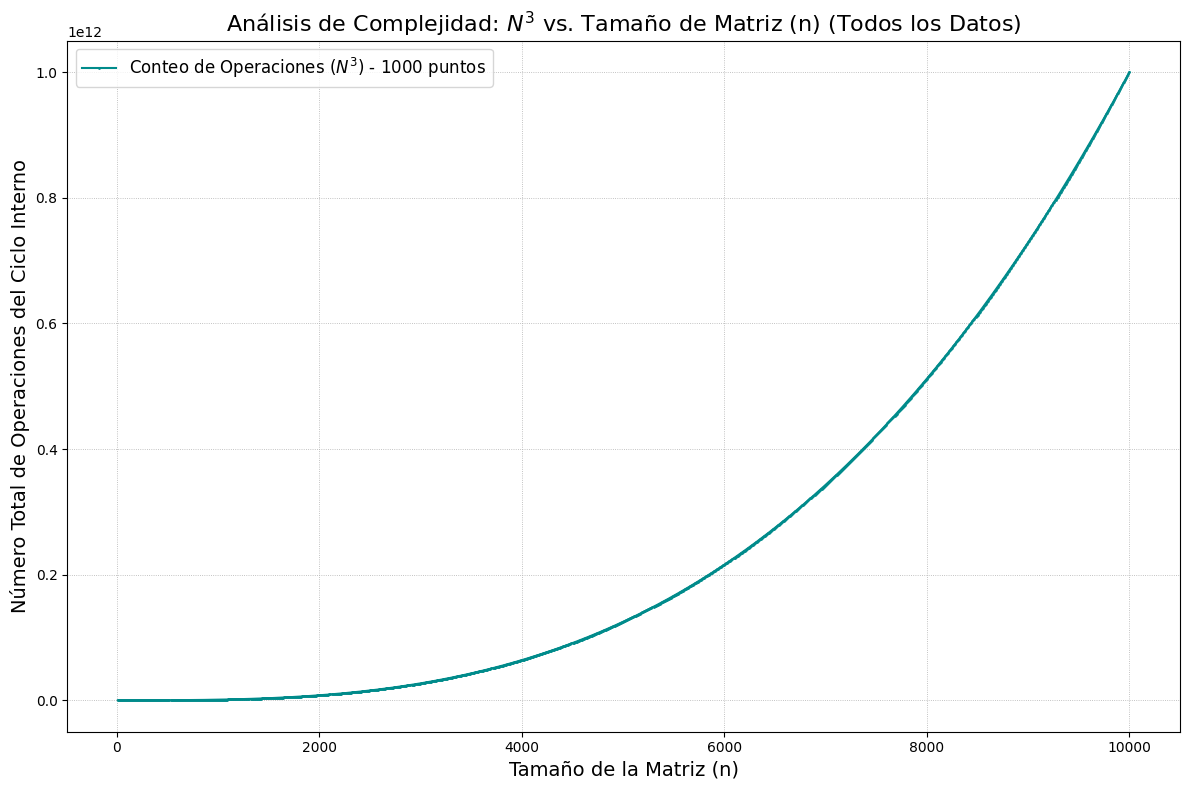


Análisis y graficación completados.


In [6]:
def ejecutar_analisis_completo_y_graficar():
    """
    Realiza el análisis de complejidad para un rango de n,
    imprime resultados tabulados filtrados, y grafica todos los resultados.
    """
    print("Iniciando análisis de complejidad y graficación automática...")
    print("===========================================================")

    valores_n_a_procesar = range(10, 10001, 10)
    max_n_ejecucion_real = 200  # Límite para ejecución real vs. cálculo directo

    tabla_resultados_completos = []

    print(f"Se procesarán datos para todos los n en la secuencia: 10, 20, ..., 10000.")
    print(f"La multiplicación completa se ejecutará para n <= {max_n_ejecucion_real}.")
    print(f"Para n > {max_n_ejecucion_real}, el conteo de operaciones (n^3) se calculará directamente.")
    print("Los mensajes de progreso en consola se mostrarán para n de 10 a 200, y para múltiplos de 100 si n > 200.\n")

    for n_actual in valores_n_a_procesar:
        mostrar_progreso_para_este_n = False
        if 10 <= n_actual <= 200:
            mostrar_progreso_para_este_n = True
        elif n_actual > 200 and n_actual <= 10000 and n_actual % 1000 == 0:
            mostrar_progreso_para_este_n = True

        if mostrar_progreso_para_este_n:
            print(f"Procesando para n = {n_actual}...")

        conteo_operaciones = 0
        tiempo_ejecucion_str = "" # Para almacenar el tiempo o 'N/A'

        if n_actual <= max_n_ejecucion_real:
            # Crear matrices dummy solo para obtener dimensiones y ejecutar el algoritmo
            matriz_a_dummy = crear_matriz_aleatoria(n_actual, 0, 1) # Contenido no es crítico aquí
            matriz_b_dummy = crear_matriz_aleatoria(n_actual, 0, 1)

            tiempo_inicio = time.time()
            _, conteo_operaciones = multiplicar_matrices(matriz_a_dummy, matriz_b_dummy)
            tiempo_fin = time.time()

            tiempo_transcurrido = tiempo_fin - tiempo_inicio
            tiempo_ejecucion_str = f"{tiempo_transcurrido:.4f}"
            if mostrar_progreso_para_este_n:
                print(f"  -> Ejecución real: Conteo={conteo_operaciones:,}, Tiempo={tiempo_ejecucion_str}s")
        else:
            conteo_operaciones = n_actual**3
            tiempo_ejecucion_str = "N/A (calculado)"
            if mostrar_progreso_para_este_n:
                print(f"  -> Cálculo directo (n^3): Conteo={conteo_operaciones:,}")

        tabla_resultados_completos.append({
            "n": n_actual,
            "conteo": conteo_operaciones,
            "tiempo_s": tiempo_ejecucion_str # Guardar el string del tiempo
        })

    print("\nProcesamiento de datos completado.")

    # Imprimir la tabla de texto con FILTRADO
    print("\n\n--- Tabla de Resultados (n vs. Conteo de Operaciones del Ciclo Interno) ---")
    print("Mostrando en tabla resultados para n de 10 a 200 (paso 10), y para múltiplos de 100 cuando n > 200.")
    print("------------------------------------------------------------------------------")
    print(f"| {'n':^5} | {'Conteo Operaciones':^30} | {'Tiempo (s)':^20} |")
    print("------------------------------------------------------------------------------")

    for resultado_completo in tabla_resultados_completos:
        n_val = resultado_completo['n']
        imprimir_esta_fila_en_tabla = False
        if 10 <= n_val <= 200:
            imprimir_esta_fila_en_tabla = True
        elif n_val > 200 and n_val <= 10000 and n_val % 1000 == 0:
            imprimir_esta_fila_en_tabla = True

        if imprimir_esta_fila_en_tabla:
            n_str = str(n_val).rjust(5)
            conteo_formateado_con_comas = f"{resultado_completo['conteo']:,}"
            conteo_str = conteo_formateado_con_comas.rjust(30)
            tiempo_str = str(resultado_completo['tiempo_s']).rjust(20) # Usar el string guardado
            print(f"| {n_str} | {conteo_str} | {tiempo_str} |")
    print("------------------------------------------------------------------------------")

    # Graficar TODOS los resultados procesados automáticamente
    if tabla_resultados_completos:
        graficar_todos_los_resultados_procesados(tabla_resultados_completos)
    else:
        print("\nNo se generaron resultados para graficar.")

    print("\nAnálisis y graficación completados.")
    print("===========================================================")


# --- Punto de Entrada Principal del Script ---
if __name__ == "__main__":
    # Opcional: Comprobación de Matplotlib al inicio
    try:
        import matplotlib
        print(f"Matplotlib versión {matplotlib.__version__} encontrado.")
    except ImportError:
        print("ADVERTENCIA CRÍTICA: La biblioteca Matplotlib no está instalada.")
        print("El programa no podrá generar gráficas y podría fallar si se intenta.")

    ejecutar_analisis_completo_y_graficar()

5.	Grafica los valores tabulados. Compara esta gráfica con la gráfica que resultaría de la función del Paso 2.

# Graficando la Funcion que obtuvimos en la parte Teorica 2

Matplotlib (versión 3.10.0) encontrado y listo para usar.
Iniciando la generación de la gráfica de complejidad O(N^3)...

Mostrando gráfica de la complejidad $N^3$...


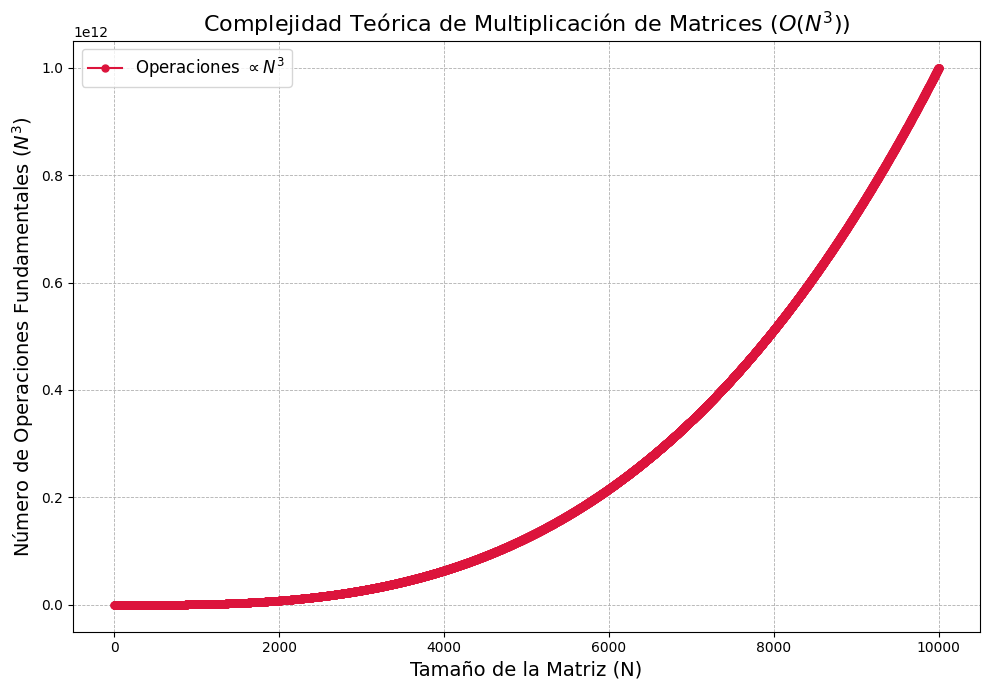


Proceso de graficación completado.


In [7]:
# --- Programa Nuevo para Graficar la Complejidad Teórica N^3 ---

def graficar_complejidad_n_cubica_teorica():
    """
    Genera datos para N y N^3 (basado en el análisis de complejidad)
    y los grafica para ilustrar la complejidad O(N^3) de la
    multiplicación de matrices estándar.
    """
    print("Iniciando la generación de la gráfica de complejidad O(N^3)...")

    # Definir el rango de valores de N para la gráfica
    n_valores = list(range(1, 10001))

    # Calcular el número de "ejecuciones" u "operaciones" proporcionales a N^3
    operaciones_n_cubica = [n**3 for n in n_valores]

    # --- Crear la Gráfica ---
    try:
        plt.figure(figsize=(10, 7)) # Tamaño de la figura (ancho, alto en pulgadas)

        plt.plot(n_valores, operaciones_n_cubica, marker='o', linestyle='-', color='crimson', markersize=5, label='Operaciones $\propto N^3$')

        plt.title('Complejidad Teórica de Multiplicación de Matrices ($O(N^3)$)', fontsize=16)
        plt.xlabel('Tamaño de la Matriz (N)', fontsize=14)
        plt.ylabel('Número de Operaciones Fundamentales ($N^3$)', fontsize=14)

        if max(operaciones_n_cubica) > 100000: # Usar notación científica para números muy grandes
             plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))

        plt.grid(True, which='both', linestyle='--', linewidth=0.6) # Rejilla
        plt.legend(fontsize=12) # Leyenda
        plt.tight_layout() # Ajusta el padding

        print("\nMostrando gráfica de la complejidad $N^3$...")
        plt.show() # Muestra la gráfica

    except Exception as e:
        print(f"\nOcurrió un error al intentar generar la gráfica: {e}")
        print("Asegúrate de tener Matplotlib instalado y configurado correctamente.")
        print("En Colab/Jupyter, puedes intentar: !pip install matplotlib")

# --- Punto de Entrada Principal del Nuevo Script ---
if __name__ == "__main__":
    #. Verificamos que Este bien Cargado el Matplotlib solo por si las moscas
    try:
        import matplotlib
        print(f"Matplotlib (versión {matplotlib.__version__}) encontrado y listo para usar.")
    except ImportError:
        print("ERROR CRÍTICO: La biblioteca Matplotlib no está instalada.")
        print("Este programa requiere Matplotlib para generar la gráfica.")
        exit() # Salir si no se puede graficar, ya que es el propósito del script.

    graficar_complejidad_n_cubica_teorica()
    print("\nProceso de graficación completado.")

5.	Grafica los valores tabulados.

# Compara esta gráfica con la gráfica que resultaría de la función del Paso 2.
   
###    Genera datos para dos representaciones de la complejidad N^3 y las grafica juntas.
###    1. Datos "simulados/analizados": N de 10 a 10000, conteo = N^3.
###    2. Datos "teóricos de referencia": N de 1 a 50, conteo = N^3.
    

#### --- Dataset 1: Del "programa anterior" (análisis automatizado) ---
#### Estos 'n' van de 10 a 10000 en pasos de 10.
#### El 'conteo' es N^3, ya sea que provenga de la ejecución simulada
#### del algoritmo N^3 o del cálculo directo para N grandes.

Matplotlib (versión 3.10.0) ha sido encontrado.
Iniciando la generación de datos para la gráfica combinada con superposición...
Generados 10000 puntos para la 'Curva Teórica Base N^3'.
Generados 1000 puntos para la curva de 'Análisis Automatizado'.

Mostrando gráfica combinada...


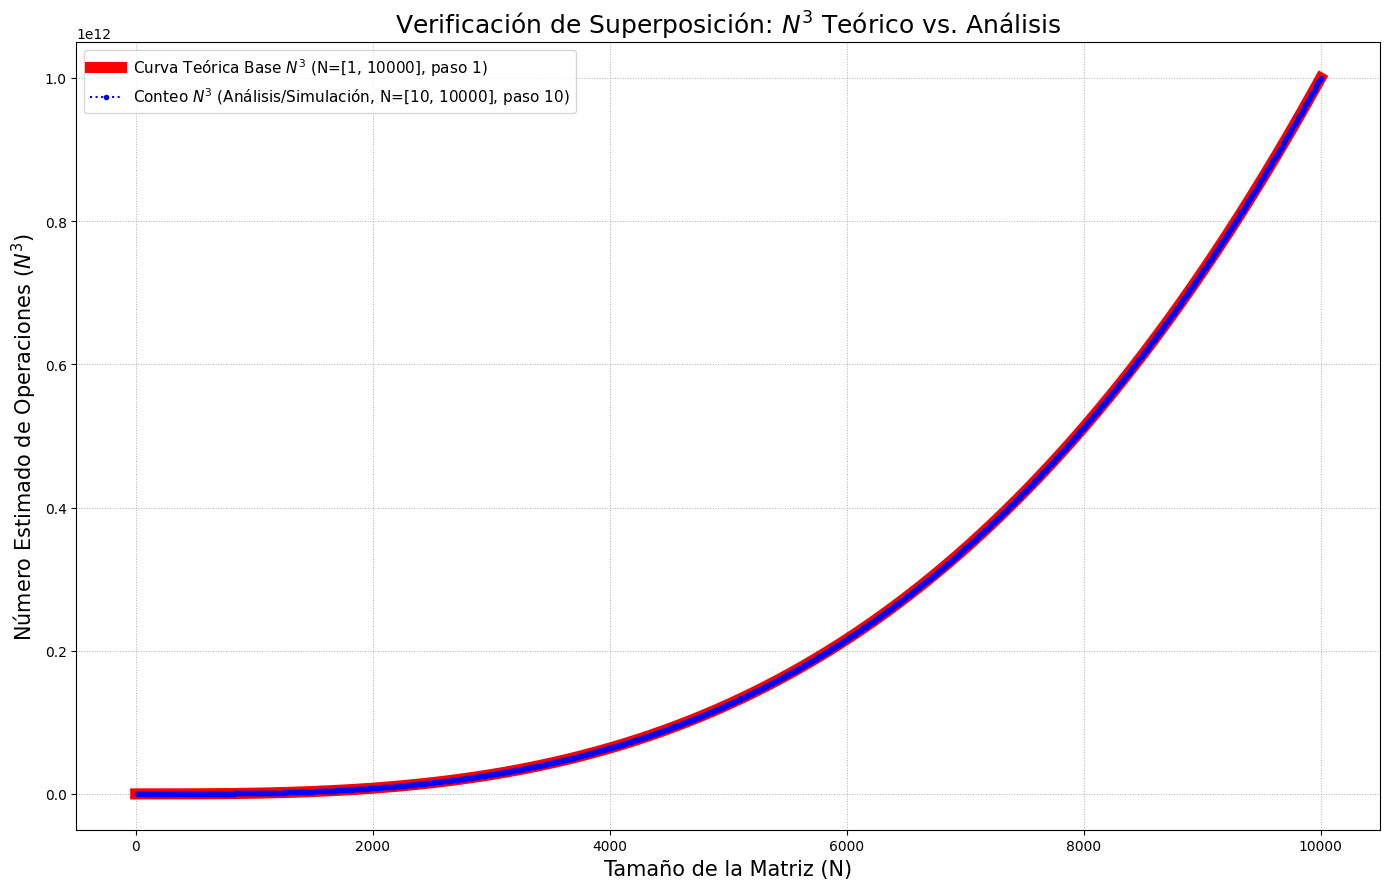


Proceso de graficación combinada finalizado.


In [8]:
# --- Programa Nuevo para Graficar y comaparar los graficos ---
def generar_y_graficar_combinado_superpuesto():

    print("Iniciando la generación de datos para la gráfica combinada con superposición...")

    # --- Dataset 1: Curva Teórica Base (Roja, sólida, se dibujará primero) ---
    # N de 1 a 10000, paso 1
    n_teorico_base = list(range(1, 10001))
    conteo_teorico_base = [n**3 for n in n_teorico_base]
    print(f"Generados {len(n_teorico_base)} puntos para la 'Curva Teórica Base N^3'.")

    # --- Dataset 2: Del "programa anterior" (Análisis Automatizado - Azul, punteada, encima) ---
    # N de 10 a 10000, paso 10
    n_analisis_automatizado = list(range(10, 10001, 10))
    conteo_analisis_automatizado = [n**3 for n in n_analisis_automatizado]
    print(f"Generados {len(n_analisis_automatizado)} puntos para la curva de 'Análisis Automatizado'.")

    # --- Crear la Gráfica Combinada ---
    try:
        plt.figure(figsize=(14, 9))

        # 1. Graficar la curva teórica base (roja, sólida, AÚN MÁS GRUESA, se dibujará primero)
        plt.plot(n_teorico_base, conteo_teorico_base,
                 linestyle='-', color='red',
                 linewidth=8, # << LÍNEA ROJA AÚN MÁS GRUESA (ej. 8 o 10)
                 label='Curva Teórica Base $N^3$ (N=[1, 10000], paso 1)')

        # 2. Graficar datos del análisis automatizado (azul, punteada, MÁS DELGADA, se dibujará encima)
        plt.plot(n_analisis_automatizado, conteo_analisis_automatizado,
                 marker='o',
                 markersize=3,
                 linestyle=':',
                 color='blue',
                 linewidth=1.5,  # Se mantiene delgada para contraste
                 label='Conteo $N^3$ (Análisis/Simulación, N=[10, 10000], paso 10)')

        plt.title('Verificación de Superposición: $N^3$ Teórico vs. Análisis', fontsize=18)
        plt.xlabel('Tamaño de la Matriz (N)', fontsize=15)
        plt.ylabel('Número Estimado de Operaciones ($N^3$)', fontsize=15)

        plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
        plt.grid(True, which='both', linestyle=':', linewidth=0.7)
        plt.legend(fontsize=11)
        plt.tight_layout()

        print("\nMostrando gráfica combinada...")
        plt.show()

    except Exception as e:
        print(f"\nOcurrió un error al intentar generar la gráfica combinada: {e}")
        print("Por favor, asegúrate de tener Matplotlib instalado correctamente.")
        print("En Colab/Jupyter, puedes ejecutar: !pip install matplotlib")

# --- Punto de Entrada Principal del Nuevo Script ---
if __name__ == "__main__":
    try:
        import matplotlib
        print(f"Matplotlib (versión {matplotlib.__version__}) ha sido encontrado.")
    except ImportError:
        print("ERROR CRÍTICO: La biblioteca Matplotlib no está instalada.")
        print("Este programa es para graficar y requiere Matplotlib.")
        exit()

    generar_y_graficar_combinado_superpuesto()
    print("\nProceso de graficación combinada finalizado.")